In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Get the Data**

In [12]:
student_data = pd.read_csv('Titanictrain.csv')

**Check Head**

In [13]:
student_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Check Info**

In [14]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Check a few measures of descriptive statistics**

In [15]:
student_data.drop(columns='PassengerId',inplace=True)

In [16]:
student_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


**Of all passengers in df, how many survived, how many died ?**

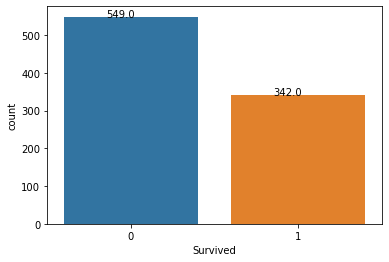

In [36]:
ax = sns.countplot(x='Survived',data=student_data);
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [19]:
student_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
# 549 are died and 342 survived

**Check the % of people who have survived.**

In [22]:
print('% of people who have survived:', (student_data.Survived.value_counts()[1]/student_data.Survived.value_counts().sum())*100)

% of people who have survived: 38.38383838383838


**Which Gender survived the crash more?**
**Male or Female?**

In [51]:
student_data.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

**Visualize the above numbers**

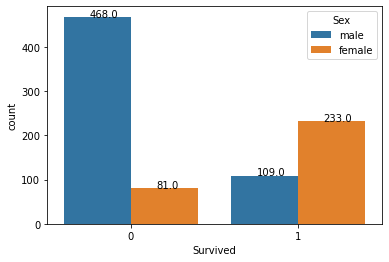

In [44]:
ax = sns.countplot(x='Survived',hue='Sex',data=student_data);
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

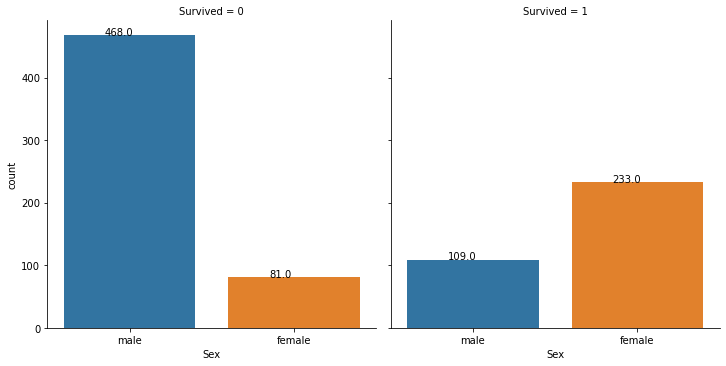

In [48]:
g = sns.catplot(x='Sex',col='Survived',data=student_data,kind='count');
ax = g.facet_axis(0,0)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax = g.facet_axis(0,1)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [31]:
# As we can see in Catagory plot Female serived more in crash

**The percentage of men and women who survived the crash are?**

In [58]:
(student_data.groupby(['Sex'])['Survived'].value_counts(1))*100

Sex     Survived
female  1           74.203822
        0           25.796178
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

**Visualize the above % gender wise**

Make pie chart

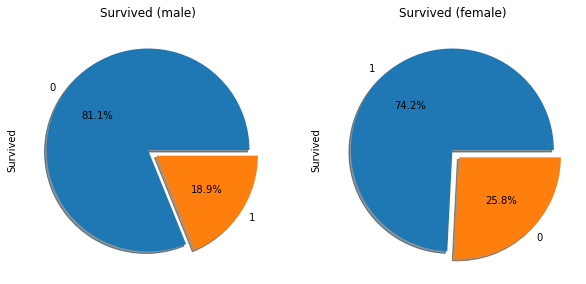

In [68]:
f,ax=plt.subplots(1,2,figsize=(10,5))
student_data['Survived'][student_data['Sex']=='male'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
student_data['Survived'][student_data['Sex']=='female'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

**Plot a table of `Pclass` and `Survived` variable**

In [85]:
SurPcl = pd.crosstab(student_data['Pclass'],student_data['Survived'],margins=True)
SurPcl

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [87]:
SurPcl[0][1]

80

**Check the proportion of passengers who survived from different Ticket Classes**

In [88]:
print("% of survivals in") 
print("Pclass=1 : ", (SurPcl[1][1]/SurPcl['All'][1])*100)
print("Pclass=2 : ", (SurPcl[1][2]/SurPcl['All'][2])*100)
print("Pclass=3 : ", (SurPcl[1][3]/SurPcl['All'][3])*100)

% of survivals in
Pclass=1 :  62.96296296296296
Pclass=2 :  47.28260869565217
Pclass=3 :  24.236252545824847


**Plot the fraction of passengers survived against their Ticket Class**

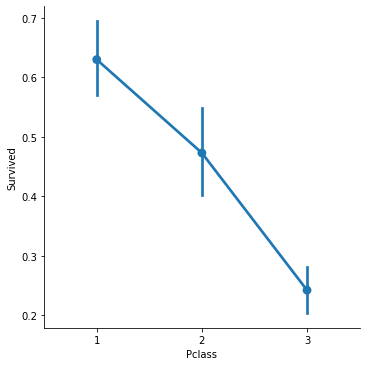

In [90]:
sns.catplot(x='Pclass',y='Survived',kind='point',data=student_data);

The above graph has plotted the confidence interval.
Let us remove the confidence intervals and try to plot it once more.

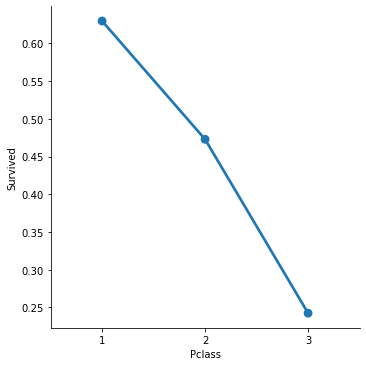

In [91]:
sns.catplot(x='Pclass',y='Survived',kind='point',data=student_data,ci=None);

**Plot a table of `Sex`,`Pclass` and `Survived` variable**

In [94]:
pd.crosstab([student_data.Sex,student_data.Pclass],student_data.Survived,margins=True)

Survived         0    1  All
Sex    Pclass               
female 1         3   91   94
       2         6   70   76
       3        72   72  144
male   1        77   45  122
       2        91   17  108
       3       300   47  347
All            549  342  891

**Plot the proportion of people who survived the crash of the ship keeping the gender in mind**

In [110]:
(student_data.groupby(['Sex','Pclass'])['Survived'].value_counts(1))*100

Sex     Pclass  Survived
female  1       1           96.808511
                0            3.191489
        2       1           92.105263
                0            7.894737
        3       0           50.000000
                1           50.000000
male    1       0           63.114754
                1           36.885246
        2       0           84.259259
                1           15.740741
        3       0           86.455331
                1           13.544669
Name: Survived, dtype: float64

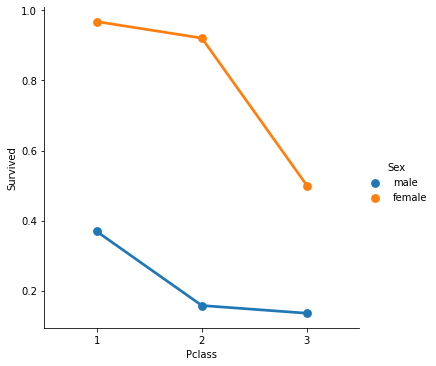

In [96]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=student_data,kind='point',ci=None);

**Make a countplot for `Survived` and `Embarked` variables**

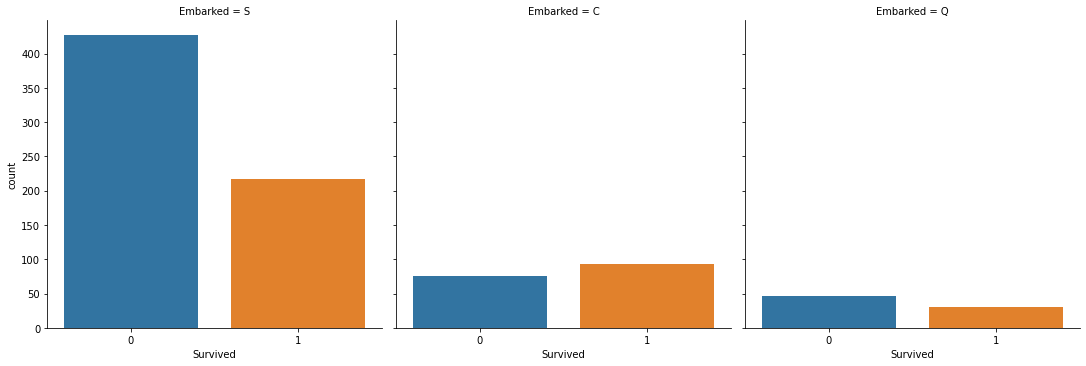

In [113]:
sns.catplot(x='Survived',col='Embarked',data=student_data,kind='count');

**Make a point plot for `Survived` and `Embarked` variables**

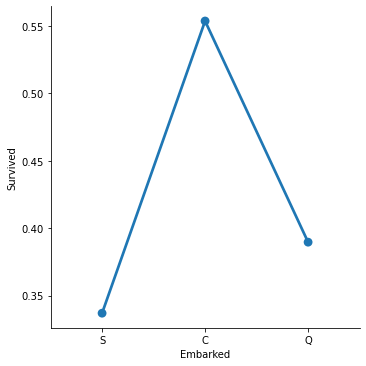

In [116]:
sns.catplot(y='Survived',x='Embarked',data=student_data,kind='point',ci=None);

**Make a point plot for `Survived`,`Embarked` and `Sex` variables**

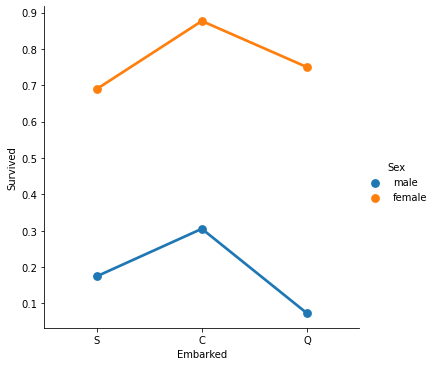

In [120]:
sns.catplot(y='Survived',x='Embarked',hue='Sex',data=student_data,kind='point',ci=None);

**Make a point plot for `Survived`,`Embarked`,`Sex`, and `Pclass` variables**

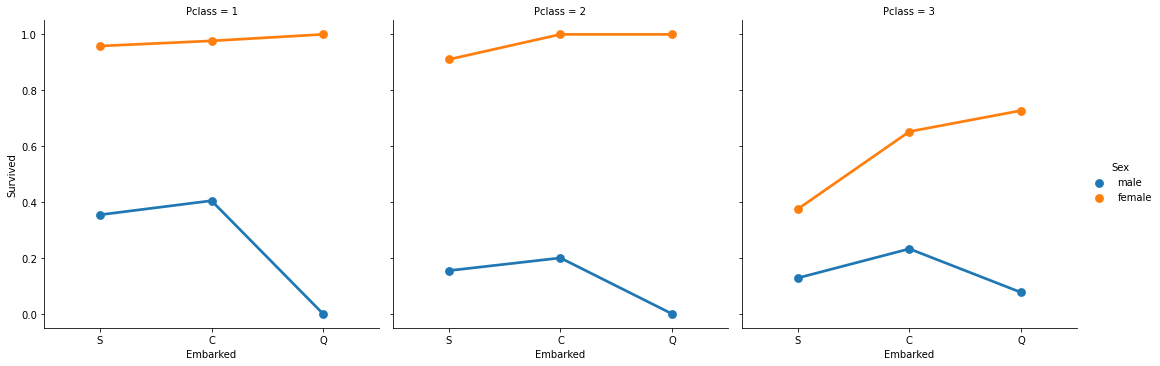

In [121]:
sns.catplot(y='Survived',x='Embarked',hue='Sex',col='Pclass',data=student_data,kind='point',ci=None);

**Make a table of `Sex`,`Pclass`,`Embarked`,`Survived` variables**

In [122]:
pd.crosstab([student_data.Survived],[student_data.Sex,student_data.Pclass,student_data.Embarked],margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

**Check the distribution of the fare**

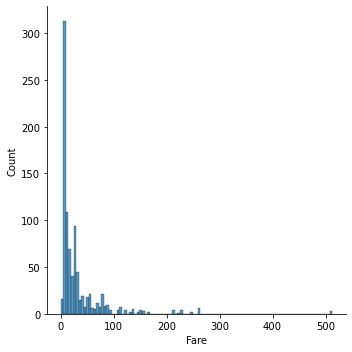

In [124]:
sns.displot(student_data.Fare);

**Make the point plot of `Survived`,`Sex`, `Pclass`**

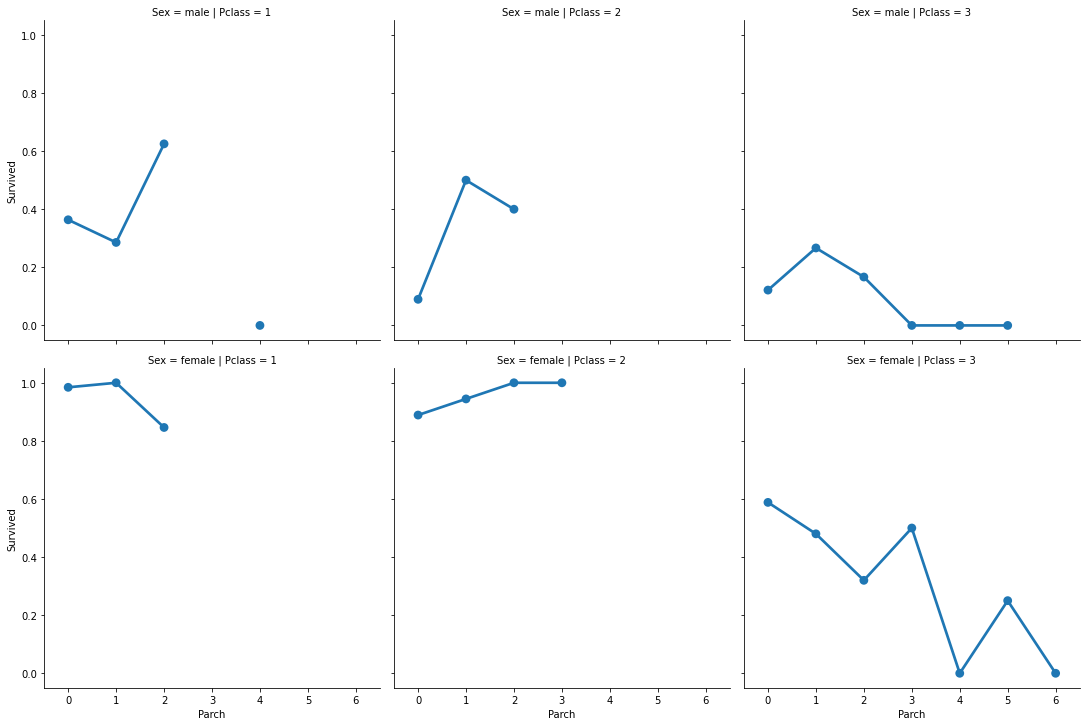

In [129]:
sns.catplot('Parch','Survived', col='Pclass' , row = 'Sex', kind='point', data=student_data,ci = False);

**Plot the proportion of siblings / spouses aboard the Titanic who have survived.**

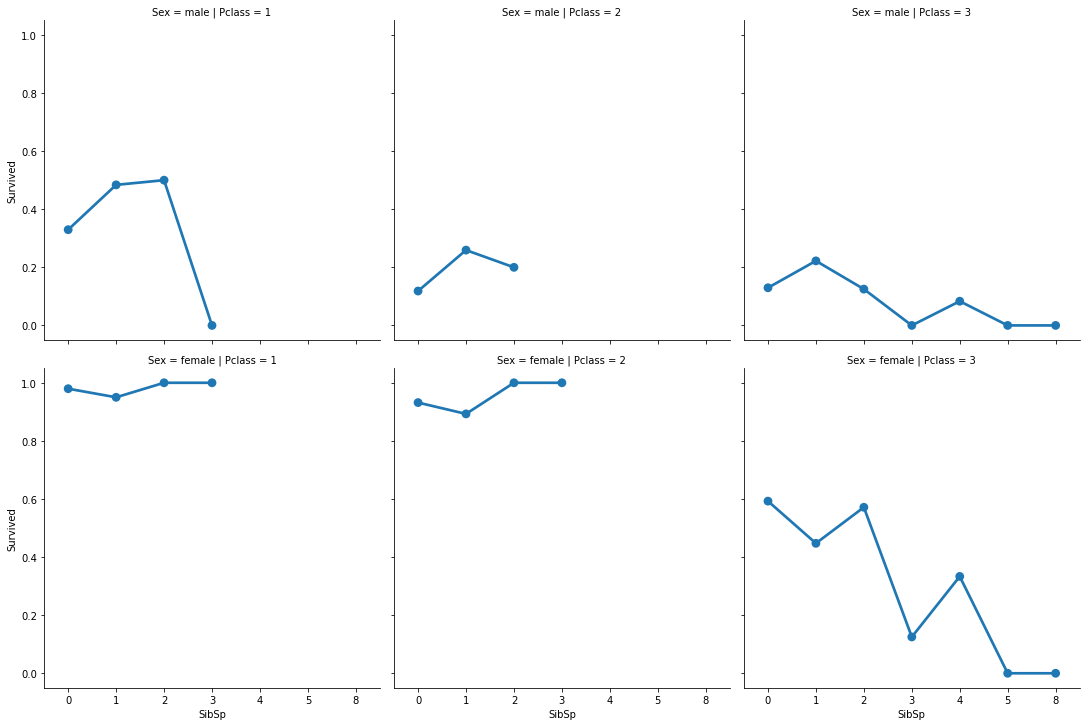

In [133]:
sns.catplot('SibSp','Survived',row='Sex',col='Pclass',data=student_data,kind='point',ci=None);

Let us check the correlation among various values.

**Make the 'heatmap' of Correlation**

<AxesSubplot:>

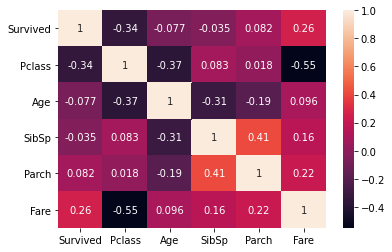

In [136]:
sns.heatmap(student_data.corr(),annot=True)

                                                Happy Learning